### Machine Learning Classification

- Model used here is from an open source library called as xgboost
- Here we perform a Binary Classification on whether the machine is likely to fail
- Steps involved:
    - Reading and preprocessing data
    - Rescaling the data
    - Hyperparameter tuning

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import L2
import xgboost


### Getting to know our data

- After importing our data we will seperate feature columns to form the X and Y labels
- Then we will use `sklearn` library functions to split data into training and testing sets

In [2]:
data=pd.read_csv('./train.csv')
data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


### Categorical encoding

- The computer can better understand the numberic data than string data
- Hence we encode the categorical data features with `pd.get_dummies` function from pandas library

In [3]:
a=data.iloc[:,2:]
pd.get_dummies(a,prefix=['Type']).astype(float)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,300.6,309.6,1596.0,36.1,140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,302.6,312.1,1759.0,29.1,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,299.3,308.5,1805.0,26.5,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,301.0,310.9,1524.0,44.3,197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,298.0,309.0,1641.0,35.4,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,300.1,311.4,1530.0,37.5,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
136425,297.5,308.5,1447.0,49.1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
136426,300.5,311.8,1524.0,38.5,214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
136427,301.7,310.9,1447.0,46.3,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
data_np=np.array(pd.get_dummies(a,prefix=['Type']).astype(float))
X=np.c_[data_np[:,0:5],data_np[:,6:]]
Y=data_np[:,5]
X.shape,Y.shape,data.shape

((136429, 13), (136429,), (136429, 14))

### Train test split

- Now that our data is clean, we will perform the train-cv-test split
- Unlike normal applications, we divide our data into 3 parts instead of 2 parts
- This is done to ensure that the hyper parameter tuning can be kept isolated from the test data

In [5]:
X_train,X_,Y_train,Y_=train_test_split(X,Y,test_size=0.4,random_state=1)
X_cv,X_test,Y_cv,Y_test=train_test_split(X_,Y_,test_size=0.5,random_state=1)
print(X_train.shape,Y_train.shape)
print(X_cv.shape,Y_cv.shape)
print(X_test.shape,Y_test.shape)

(81857, 13) (81857,)
(27286, 13) (27286,)
(27286, 13) (27286,)


### Normalization

- Normalization is process in which we rescale our data for faster computation
- Here we will be using z-score-normalization by implementing `StandardScaler` on the train data 

In [6]:
input_scaler=StandardScaler()
input_scaler.fit(X_train[:,:5])
X_train_scaled=np.c_[input_scaler.transform(X_train[:,:5]),X_train[:,5:]]

X_cv_scaled=np.c_[input_scaler.transform(X_cv[:,:5]),X_cv[:,5:]]

X_test_scaled=np.c_[input_scaler.transform(X_test[:,:5]),X_test[:,5:]]

print(np.mean(X_train_scaled,axis=0))
print(np.mean(X_cv_scaled,axis=0))
print(np.mean(X_test_scaled,axis=0))

[ 4.40026451e-12 -1.10027128e-12  5.23785149e-16 -1.35804546e-13
 -1.43767351e-18  1.49040400e-03  5.09424973e-03  2.38220311e-03
  3.83595783e-03  2.28447170e-03  6.60053508e-02  6.98779579e-01
  2.35215070e-01]
[ 0.01752229  0.01452612  0.01369736 -0.01398654 -0.00419474  0.00135601
  0.0045811   0.00205233  0.00373818  0.00230888  0.06435535  0.69969948
  0.23594517]
[ 0.01557258  0.01525579  0.00222324  0.00172314 -0.00937932  0.00194239
  0.00593711  0.00278531  0.00454446  0.00212563  0.06464854  0.69860001
  0.23675145]


### HyperParameter Tuning

- It is one of the most essential steps towards optimizing the throughput of any model
- Here we are varying the maximum depth of the decision trees created by `XGBClassifier` 
- The results have been represented in the plots below

In [54]:
precision_list_train=[]
recall_list_train=[]
precision_list_cv=[]
recall_list_cv=[]
accuracy_list_train=[]
accuracy_list_cv=[]
tree=[]

precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()
accuracy=tf.keras.metrics.Accuracy()

for i in range(1,21):
    print(f"Training model {i}...")
    model=xgboost.XGBClassifier(random_state=1,max_depth=i,n_estimators=500)
    model.fit(X_train_scaled,Y_train)
    print("Done!")

    tree.append(model)

    Y_train_hat=model.predict(X_train_scaled)
    Y_cv_hat=model.predict(X_cv_scaled)

    precision=tf.keras.metrics.Precision()
    recall=tf.keras.metrics.Recall()
    accuracy=tf.keras.metrics.Accuracy()

    precision.update_state(Y_train_hat,Y_train)
    recall.update_state(Y_train_hat,Y_train)
    accuracy.update_state(Y_train_hat,Y_train)

    precision_list_train.append(precision.result().numpy())
    recall_list_train.append(recall.result().numpy())
    accuracy_list_train.append(accuracy.result().numpy())

    precision=tf.keras.metrics.Precision()
    recall=tf.keras.metrics.Recall()
    accuracy=tf.keras.metrics.Accuracy()

    precision.update_state(Y_cv_hat,Y_cv)
    recall.update_state(Y_cv_hat,Y_cv)
    accuracy.update_state(Y_cv_hat,Y_cv)

    precision_list_cv.append(precision.result().numpy())
    recall_list_cv.append(recall.result().numpy())
    accuracy_list_cv.append(accuracy.result().numpy())

Training model 1...
Done!
Training model 2...
Done!
Training model 3...
Done!
Training model 4...
Done!
Training model 5...
Done!
Training model 6...
Done!
Training model 7...
Done!
Training model 8...
Done!
Training model 9...
Done!
Training model 10...
Done!
Training model 11...
Done!
Training model 12...
Done!
Training model 13...
Done!
Training model 14...
Done!
Training model 15...
Done!
Training model 16...
Done!
Training model 17...
Done!
Training model 18...
Done!
Training model 19...
Done!
Training model 20...
Done!


### Metrics vs Max_Depth

- Plot 1:Precision vs max_depth
- Plot 2:Recall vs max_depth
- Plot 3:Accuracy vs max_depth

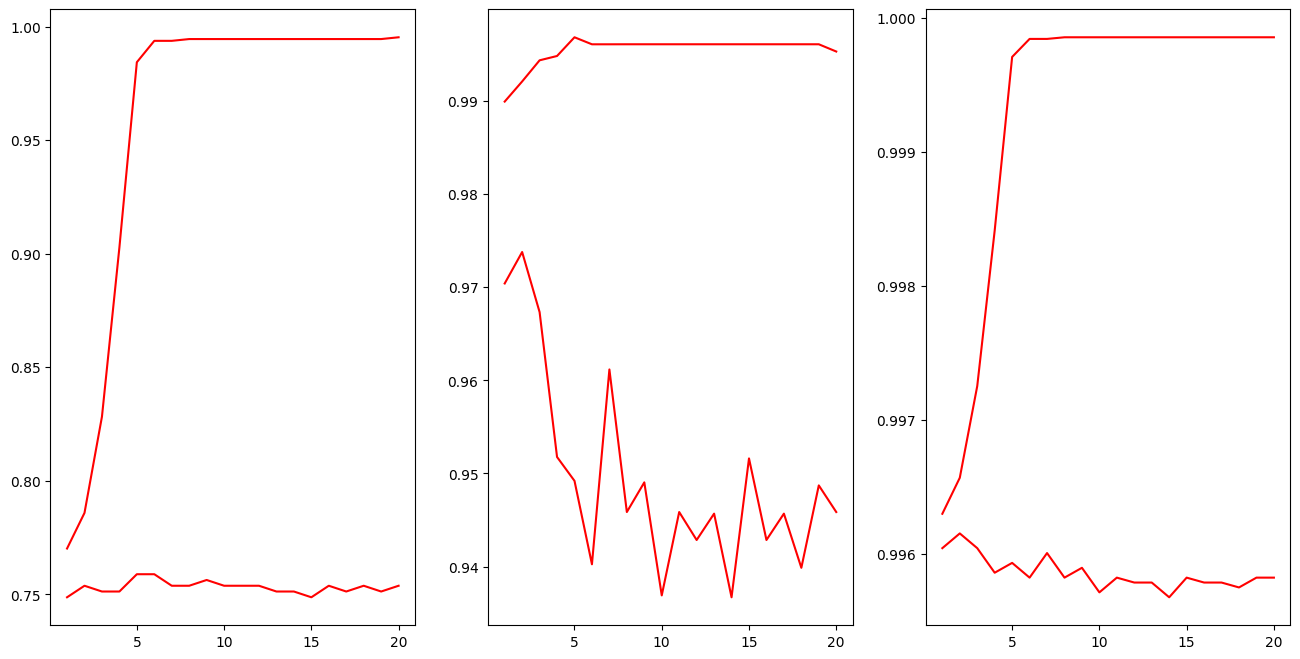

In [55]:
fig,ax=plt.subplots(1,3,figsize=(16,8))

ax[0].plot(range(1,21),precision_list_train,color='r')
ax[0].plot(range(1,21),precision_list_cv,color='r')

ax[1].plot(range(1,21),recall_list_train,color='r')
ax[1].plot(range(1,21),recall_list_cv,color='r')

ax[2].plot(range(1,21),accuracy_list_train,color='r')
ax[2].plot(range(1,21),accuracy_list_cv,color='r')

plt.show()

Based on the above results, Model 6 seems to perform well

In [68]:
model_choice=6
model=tree[model_choice]

In [69]:
Y_test_hat=model.predict(X_test_scaled)

precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()
accuracy=tf.keras.metrics.Accuracy()

precision.update_state(Y_test_hat,Y_test)
recall.update_state(Y_test_hat,Y_test)
accuracy.update_state(Y_test_hat,Y_test)

print(precision.result().numpy())
print(recall.result().numpy())
print(accuracy.result().numpy())

0.79123175
0.9594937
0.99574876


### Here we are creating the predictions for the test dataset that has to be uploaded back to kaggle for grading

- We follow steps similar to the steps performed on the training dataset

In [70]:
Test_data=pd.read_csv('./test.csv')
Test_data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [71]:
Id=Test_data['id']
b=Test_data.iloc[:,2:]
b.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [64]:
pd.get_dummies(b,['Type']).astype(float)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,302.3,311.5,1499.0,38.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,301.7,311.0,1713.0,28.8,17.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,301.3,310.4,1525.0,37.7,96.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,300.1,309.6,1479.0,47.6,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,303.4,312.3,1515.0,41.3,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,302.3,311.4,1484.0,40.4,15.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
90950,297.9,309.8,1542.0,33.8,31.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
90951,295.6,306.2,1501.0,41.4,187.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
90952,298.1,307.8,1534.0,40.3,69.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [73]:
X_r=np.array(pd.get_dummies(b,['Type']).astype(float))
X_r_scaled=np.c_[input_scaler.transform(X_r[:,:5]),X_r[:,5:]]
print(X_r_scaled[:5])

[[ 1.31525574  1.13051787 -0.15043777 -0.27900966 -0.69797408  0.
   0.          0.          0.          0.          0.          1.
   0.        ]
 [ 0.99309333  0.76983401  1.3907427  -1.36232625 -1.37117578  0.
   0.          0.          0.          0.          0.          1.
   0.        ]
 [ 0.77831839  0.33701339  0.03680845 -0.3143352  -0.13436336  0.
   0.          0.          0.          0.          0.          1.
   0.        ]
 [ 0.13399357 -0.24008078 -0.29447333  0.85140765 -1.55904602  0.
   0.          0.          0.          0.          0.          0.
   1.        ]
 [ 1.90588682  1.70761204 -0.03520933  0.10957129  0.147442    0.
   0.          0.          0.          0.          0.          0.
   1.        ]]


In [74]:
Y_r=model.predict(X_r_scaled)
Y_r

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
Result=pd.DataFrame(np.c_[Id,Y_r],columns=['id','Machine failure'])
Result

,id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0
...,...,...
90949,227378,0
90950,227379,0
90951,227380,0
90952,227381,0


In [85]:
Result.to_csv('./submission.csv',index=False)